<center> <h1> <b>HOMEWORK 2<b></h1> </center>
<center> <h2> Numerical Analysis II - 2022</h2> </center>
<center> <h3> Fabián Eduardo Suárez Castellanos and Sebastian Aguilera Novoa</h3> </center>

In [21]:
using QuadGK, Calculus, PlotlyJS

## 1.T

Use the Galerkin method with the functions ${\phi_1, \phi_2} = \{x(x-2), x(x-1)^2\}$ to get an aproximated solution (two parameters) of the BVP solution

$$ \frac{d^2 u}{dx^2} + u = 1; \qquad 0<x<1\qquad \text{with} \quad u(0)=0, \qquad u'(1)= \frac{du}{dx}\Bigg|_{x=1}=0$$

Find the residual error $\epsilon(x)= d^2u_n/dx^2+u_n-1$. Plot in a single plane the aproximate solution $u_n$, the exact solution $u=-\cos(x)-\tan(1)\sin(x)+1$ and the residual error $\epsilon(x)$

### Solution

Multiplying by a test function $v|v(0) =  v'(1) = 0$ and integrating over $I$ the differential equation

$$\int_0^1v u'' dx + \int_0^1 vu dx = \int_0^1  v dx  $$

integrating by steps the first term and rem

$$ \int_0^1 vu'' dx =   vu'\Big|_0^1 - \int_0^1 v'u' dx = vu'\Big|_0^1 - \int_0^1 v'u' dx = v(1)u'(1) - v(0)u'(0)- \int_0^1 v'u' dx  =- \int_0^1 v'u' dx $$

$$ - \int_0^1 v'u' dx + \int_0^1 vu dx = \int_0^1  v dx  $$

Rewriting the last equation as $a(u,v) = Lu$ with

$$
a(u,v) = \int_0^1 (v'u' - vu) dx
Lv = -\int_0^1  v dx 
$$

Now, approximating by finite elements. Find $u \in V_h$ such that

$$ - \int_0^1 v'u_h' dx + \int_0^1 vu_h dx = \int_0^1  v dx  $$

where the following functions were used

$${\phi_1, \phi_2} = \{x^2-2x, x^3-2x^2+x\}, \qquad {\phi_1', \phi_2'} = \{2x-2, 3x^2-4x+1\}$$

Finite dimensional space to build the lineal system, and remembering that $v$ is any element of the base set 

$$ u_h(x) = u_1 \phi_1(x) + u_2 \phi_2(x), \qquad  u_h'(x) = u_1 \phi_1'(x) + u_2 \phi_2'(x), \qquad v = \phi_{1,2}(x), \qquad v' = \phi_{1,2}'(x)  $$

then, the system of equations is

$$ -u_1 \int_0^1  \phi_1'\phi_1' dx - u_2 \int_0^1 \phi_1'\phi_2' dx + u_1 \int_0^1\phi_1\phi_1dx+ u_2 \int_0^1\phi_1\phi_2dx= \int_0^1  \phi_1(x) dx\\
 -u_1 \int_0^1  \phi_2'\phi_1' dx - u_2 \int_0^1 \phi_2'\phi_2' dx + u_1 \int_0^1\phi_2\phi_1dx+ u_2 \int_0^1\phi_2\phi_2dx= \int_0^1  \phi_2(x) dx$$

factorizing

$$ u_1 \left( \int_0^1\phi_1\phi_1dx - \int_0^1  \phi_1'\phi_1' dx\right) + u_2  \left(\int_0^1\phi_1\phi_2dx- \int_0^1 \phi_1'\phi_2' dx\right)  = \int_0^1  \phi_1(x) dx = b_1\\
u_1 \left(\int_0^1\phi_2\phi_1dx -  \int_0^1  \phi_2'\phi_1' dx  \right) + u_2  \left( \int_0^1\phi_2\phi_2dx- \int_0^1 \phi_2'\phi_2' dx\right)  = \int_0^1  \phi_2(x) dx = b_2$$


This system of equations can be see as a matrix system

$$ M u_n = b$$

where $M$ is a matrix $2\times2$, $u$ a vector $(u_1, u_2)^T$, and $v$ also a vector $(b_1, b_2)^T$.

Let's calculate each matrix component

$$
M_{11} =  \int_0^1\phi_1\phi_1dx - \int_0^1  \phi_1'\phi_1' dx =  \int_0^1x^2(x-2)^2dx - \int_0^1  4(x-1)^2 dx\\
 = int_0^1x^2(x^2-4x+4)dx - 4\int_0^1  (x^2-2x+1) dx = int_0^1(x^4-4x^3+4x^2 - 4(x^2-2x+1)) dx  = int_0^1(x^4-4x^3+8x-4) dx \\
 = \left[\frac{1}{5}x^5-x^4+4x^2-4x \right]\Big|_0^1 = \frac{1}{5}-1+4-4 \quad \Rightarrow \quad \boxed{M_{11} = - \frac{4}{5}}
$$


$$
M_{12} =  \int_0^1\phi_1\phi_2dx- \int_0^1 \phi_1'\phi_2' dx = \int_0^1x^2(x-2)(x-1)^2dx- \int_0^1 2(x-1)(3x^2-4x+1) dx\\
 = \int_0^1x^2(x-2)(x^2-2x+1)dx- \int_0^1 2(3x^3-4x^2+x - 3x^2+4x-1) dx = \int_0^1x^2(x^3-2x^2+x - 2x^2+4x-2)dx- \int_0^1 2(3x^3-4x^2+x - 3x^2+4x-1) dx     \\
 = \int_0^1(x^5-4x^4+5x^3-2x^2 - 2(3x^3-7x^2+5x-1)) dx  = \int_0^1(x^5-4x^4-x^3+12x^2 -10x +2) dx \\
 =  \left[\frac{1}{6}x^6-\frac{4}{5}x^5-\frac{1}{4}x^4+4x^3 -5x^2 +2x \right]\Big|_0^1 = \frac{1}{6}-\frac{4}{5}-\frac{1}{4}+4-5+2 \quad \Rightarrow \quad \boxed{M_{12} = \frac{7}{60}}
$$


$$
M_{21} =  \int_0^1\phi_2\phi_1dx -  \int_0^1  \phi_2'\phi_1' dx = \int_0^1x^2(x-2)(x-1)^2dx -  \int_0^1 2(x-1)(3x^2-4x+1) dx = M_{12}  \\ 
\Rightarrow \quad \boxed{M_{21} = \frac{7}{60}}
$$


$$
M_{22} =  \int_0^1\phi_2\phi_2dx- \int_0^1 \phi_2'\phi_2' dx = \int_0^1x^2 (x-1)^4dx - \int_0^1 (3x^2-4x+1)^2 dx \\
= \int_0^1x^2 (x^4 -4x^3 + 6x^2 -4x +1) dx - \int_0^1 (9x^4+16x^2+1 -24x^3 +6x^2 -8x) dx  \\
= \int_0^1 (x^6 -4x^5 + 6x^4 -4x^3 +x^2 - (9x^4-24x^3+22x^2-8x +1)) dx\\
= \int_0^1 (x^6 -4x^5 - 3x^4 +20x^3 -21x^2 + 8x -1) dx = \left[\frac{1}{7} x^7 -\frac{4}{6}x^6 - \frac{3}{5}x^5 +5x^4 -7x^3 + 4x^2 -x  \right]\Big|_0^1 \\
= \frac{1}{7} -\frac{4}{6} - \frac{3}{5} +5 -7 + 4 -1 = \frac{1}{7} -\frac{4}{6} - \frac{3}{5} +1 \quad \Rightarrow \quad \boxed{M_{22} = -\frac{13}{105}}
$$

Similarly, the vector $b$ is calculated

$$
b_1 = \int_0^1  \phi_1(x) dx = \int_0^1 (x^2-2x) dx = \left[\frac{1}{3} x^3-x^2 \right]\Big|_0^1 =  \frac{1}{3}-1  \quad \Rightarrow \quad \boxed{b_1=-\frac{2}{3}} \\
b_2 = \int_0^1  \phi_2(x) dx = \int_0^1 (x^3-2x^2+x) dx = \left[\frac{1}{4}x^4-\frac{2}{3}x^3+\frac{1}{2}x^2 \right]\Big|_0^1 = \frac{1}{4}-\frac{2}{3}+\frac{1}{2}   \quad \Rightarrow \quad \boxed{b_2=\frac{1}{12}}
$$

Then, the final matrix and vectors are

$$ M  = \begin{pmatrix}
- \frac{4}{5} & \frac{7}{60} \\
\frac{7}{60} & -\frac{13}{105} 
\end{pmatrix}, \qquad  b  = \begin{pmatrix}
- \frac{2}{3} \\
\frac{1}{12}
\end{pmatrix},  \qquad  u_n  = \begin{pmatrix}
u_1 \\
u_2
\end{pmatrix} $$


In [22]:
phi1(x) = x^2 - 2*x;     phi1p(x) = 2x - 2;       phi1pp(x) = 2
phi2(x) = x * (x-1)^2;   phi2p(x) = 3x^2 -4x +1;  phi2pp(x) = 6x - 4  

integral11, err11 = quadgk(x -> phi1(x)*phi1(x) - phi1p(x)*phi1p(x), 0, 1, rtol=1e-8)
integral12, err12 = quadgk(x -> phi1(x)*phi2(x) - phi1p(x)*phi2p(x), 0, 1, rtol=1e-8)
integral21, err21 = quadgk(x -> phi2(x)*phi1(x) - phi2p(x)*phi1p(x), 0, 1, rtol=1e-8)
integral22, err22 = quadgk(x -> phi2(x)*phi2(x) - phi2p(x)*phi2p(x), 0, 1, rtol=1e-8)

integralb1, errb1 = quadgk(x -> phi1(x), 0, 1, rtol=1e-8)
integralb2, errb2 = quadgk(x -> phi2(x), 0, 1, rtol=1e-8)

M = [integral11 integral12; integral21 integral22]
b = [integralb1; integralb2]

u = M \ b

uh(x)   =  u[1]*phi1(x)   + u[2]*phi2(x);
uhp(x)  =  u[1]*phi1p(x)  + u[2]*phi2p(x);
uhpp(x) =  u[1]*phi1pp(x) + u[2]*phi2pp(x);

display(u)

2-element Vector{Float64}:
 0.8522991175104505
 0.13005109150023228

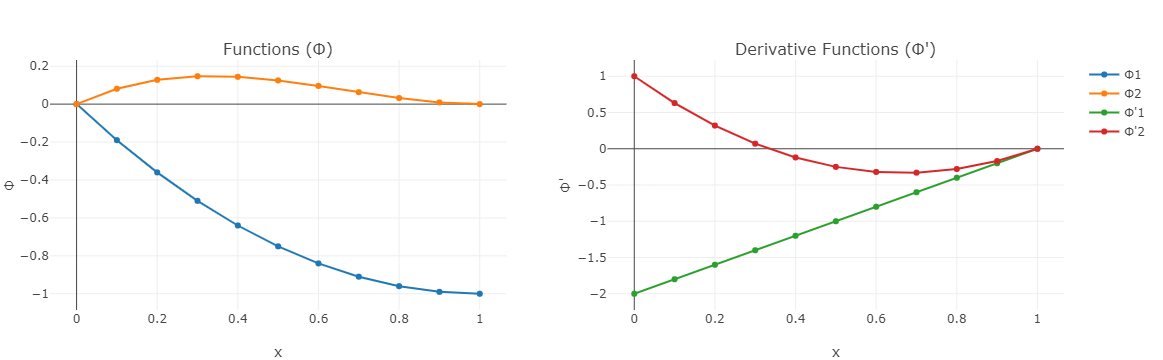

In [23]:
x=0:0.1:1

pfunc = plot([scatter(x=x,y=phi1.(x), name="Φ1"), scatter(x=x,y=phi2.(x), name="Φ2")],
            Layout(title="Functions (Φ)",  xaxis_title="x",  yaxis_title="Φ"))

pfuncp = plot([scatter(x=x,y=phi1p.(x), name="Φ'1"), scatter(x=x,y=phi2p.(x), name="Φ'2")],
            Layout(title="Derivative Functions (Φ')",  xaxis_title="x",  yaxis_title="Φ'"))

[pfunc pfuncp]

Finally, let's plot the exact function, approximate function, and error. To calculate the error first is necesary find $u''_h$  

$$ u_h''(x) = u_1 \phi_1''(x) + u_2 \phi_2''(x) = u_1 (2) + u_2 (6x-4) $$

Then, the error is 

$$ \epsilon(x) = u_h''(x) + u_h(x) -1 = u_1 (2 + x(x-2)^2 ) + u_2 (6x-4+x(x-1)^2) -1$$

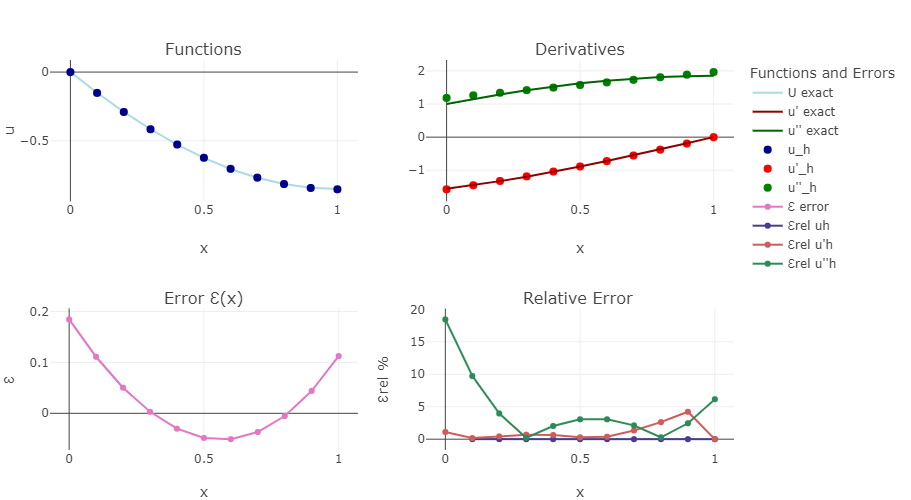

In [24]:
exact(x)   = -cos(x) - tan(1)sin(x) + 1
exactp(x)  = sin(x) - tan(1)cos(x) 
exactpp(x) = cos(x) + tan(1)sin(x) 

pf = plot([scatter(x=x,y=exact.(x), name="U exact", mode="lines", marker=attr(color="LightBlue"), legendrank=1), scatter(x=x,y=uh.(x), name="u_h", mode="markers", marker=attr(color="DarkBlue",size=8)) ],
    Layout(title="Functions",  xaxis_title="x",  yaxis_title="u"))

pd = plot([scatter(x=x,y=uhp.(x), name="u'_h", mode="markers", marker=attr(size=8, color="red")), scatter(x=x,y=uhpp.(x), name="u''_h", mode="markers", marker=attr(size=8, color="green")),
           scatter(x=x,y=exactp.(x), name="u' exact", mode="lines", marker=attr(size=8, color="DarkRed"), legendrank=2), scatter(x=x,y=exactpp.(x), name="u'' exact", mode="lines", marker=attr(size=8, color="DarkGreen"), legendrank=3) ],
    Layout(title="Derivatives",  xaxis_title="x",  yaxis_title=""))

pe = plot([scatter(x=x,y=uhpp.(x) + uh.(x) .-1,mode="markers+lines", name="Ɛ error") ], 
         Layout(title="Error Ɛ(x)",  xaxis_title="x",  yaxis_title="Ɛ"))

ep = 100*abs.((exactp.(x) - uhp.(x))./exactp.(x))
ep[end] = 0 #to avoid error of 100% at end value

pde = plot([scatter(x=x,y=abs.((exact.(x) - uh.(x))./exact.(x)), mode="markers+lines", name="Ɛrel uh", marker=attr(color="DarkSlateBlue")),
            scatter(x=x,y=ep, mode="markers+lines", name="Ɛrel u'h", marker=attr(color="IndianRed")),
            scatter(x=x,y=100*abs.((exactpp.(x) - uhpp.(x))./exactpp.(x)), mode="markers+lines", name="Ɛrel u''h", marker=attr(color="SeaGreen"))], 
         Layout(title="Relative Error ",  xaxis_title="x",  yaxis_title="Ɛrel %"))


pde
Plot = [pf pd; pe pde]

relayout!(Plot, width=1150, height=500, legend_title_text="Functions and Errors")#, title_text="Functions and Error")
Plot 

## 2.T 
Prove that $\ddot{u}$ is a solution of the variational problem. Find $u\in H_0^1(I)$ such that

$$ \int_I u'v' dx = \in_I fv, \qquad \forall v\in H_0^1(I) $$

if and only if $\ddot{u}$ is a functional minimizer.

$$ F(w) = \frac{1}{2} \int_I (w')^2 - \int_I fw dx $$

over the space $H_0^1(I)$

## 3.TP

Consider the problem with Robin conditions

$$ -u''+2u=4-2x^2, \qquad x\in I = (-1,1) $$
$$ u'(-1)=\frac{\alpha}{\kappa}(u(-1)+1), \quad u'(1) = -\frac{\alpha}{\kappa} (u(1)+1) $$

a) Write the weak formulation corresponding to the boundary value problem $(e)-(3)$ 

b) Prove the existence and uniquiness of the weak solution.

c) To discretize the weak problem consider the picewise lineal polynomial spaces and write exactly the rigid matrix, load and vector mass.

d) Using the result found before, part c, do the modifications to the Matlab codes and solve the problem taking $\alpha =2$ and $\kappa=1$. Plot the numerical solution and compare it with the exact solution $u(x)=1-x^2$.

e) Solve the equation with Dirichlet homogeneous boundary condtions. Plot and compare it with the exact solution $u(x)=1-x^2$.

f) Plot the error done in each mesh point $\left( |u(x_i)-u_h(x_i)|,i=0,1,...,m  \right)$ of the found solutions in the items d) and e). 

### Solution

#### a) 
Let's start with the variational formulation. First, multiplying by a test function $v$ and integrating over $I$ the differential equation

$$ -\int_{-1}^1 u'' v dx + 2 \int_{-1}^1 u v dx = \int_{-1}^1 (4+2x^3) v dx $$

Now, integratin by steps the first term and choosing $v|v(-1)= v(1) = 0$

$$ -\int_{-1}^1 u'' v dx  =  \int_{-1}^1 u' v'dx -vu'\Big|_{-1}^1 = \int_{-1}^1 u' v'dx +\left[ v(-1)u'(-1) -v(1)u'(1) \right] \\
= \int_{-1}^1 u' v'dx +\left[ v(-1)\frac{\alpha}{\kappa}(u(-1)+1)  +\frac{\alpha}{\kappa}(u(1)+1) v(1) \right] = \int_{-1}^1 u' v'dx  $$

where the Robin conditions were used. Finally, replacing the last term in the first equation the weak problem is founded

$$ \boxed{\int_{-1}^1 u' v'dx + 2 \int_{-1}^1 u v dx + \frac{\alpha}{\kappa}\left[u(1)v(1) +u(-1) v(-1)\right] = \int_{-1}^1 (4+2x^3) v dx - \frac{\alpha}{\kappa}\left[ v(-1) + v(1) \right]}$$

This is the weak problem. This equation can be writen as follows

$$ a(u,v) = Lv, \qquad \forall v\in H_0^2(0,L)$$

where 

$$a(u,v) = \int_{-1}^1 (u' v' +2uv)dx + \frac{\alpha}{\kappa}\left[u(1)v(1) +u(-1) v(-1)\right] \\
Lv =  \int_{-1}^1 (4+2x^3) v dx -  \frac{\alpha}{\kappa}\left[ v(-1) + v(1) \right]$$


#### b)
To prove its uniqueness let's verify the Lax-Milgram hypothesis with $v\in H$.

- **Bilineal Countinuity:**

Using Cauchy-Schwartz, and Poincare inequality

$$ 
|a(u,v)| = \left|\left| \int_{-1}^1 (u' v' +2uv)dx \right|\right|   \leq   \int_0^L |u'| \cdot 2 |v'| dx  + 2 \int_0^L |u| \dot|v| dx
\leq  ||u'||_{L^2} \cdot  ||v'||_{L^2}  + 2 ||u||_{L^2} \cdot ||v||_{L^2} \\
\Rightarrow \boxed{|a(u,v)| \leq  (1 +2 C_P^2) \cdot ||u'||_{L^2} \cdot  ||v'||_{L^2}}
$$

- **Coercivity:**
$$ 
a(u,u) =  \int_{-1}^1 (u' u' +2uu)dx  \geq  ||u'||_{L^2}^2 + \frac{2}{2} \int_{-1}^{1} (u^2)' dx  =  ||u'||_{L^2}^2 +  u^2 \Big|_{-1}^{1}\\
\Rightarrow \boxed{ a(u,u) \geq  ||u'||_{L^2}^2 = \frac{1}{\sqrt{C_P^2+1}}||u'||_{H^1_0(-1,1)}^2}
$$

- **Continuity of $v$ in H:**
$$
|Lv| = \left|\int_{-1}^1 (4+2x^3) v dx \right| \leq ||4+2x^3||_{L^2} ||v||_{L^2} \leq  \sqrt{\frac{232}{7}}C_P ||v'||_{L^2} \\
\Rightarrow \boxed{ \quad ||L||_{H} \leq  \sqrt{\frac{232}{7}} C_P ||v'||_{L^2} }
$$


where
$$||4+2x^3||_{L^2}^2  = \int_{-1}^{1} (4+2x^3)^2 dx =  \int_{-1}^{1} (16+4x^6+16x^3) dx = \left( 16x+\frac{4}{7}x^7+4x^4\right)\Big|_{-1}^1 =  16+\frac{4}{7}+4 -
 +16+\frac{4}{7}-4 = 32+\frac{8}{7}=\frac{232}{7}$$

Then, the Lax-Milgram shows that there is a unique solution to the problem.

#### c)
Now, let's discretize the weak problem. To do it, the picewise lineal polynomial functions will be used as base


$$
\phi_{i}(x):= \begin{cases}\frac{x-x_{i-1}}{h_{i}} & \text { si } x \in \Omega_{i} \\ \frac{x_{i+1}-x}{h_{i+1}} & \text { if } x \in \Omega_{i+1} \\ 0 & \text {other case}\end{cases}, \qquad \phi_{i}'(x):= \begin{cases}\frac{1}{h_{i}} & \text { if } x \in \Omega_{i} \\ \frac{-1}{h_{i+1}} & \text { if } x \in \Omega_{i+1} \\ 0 & \text {other case}\end{cases}
$$

Using these functions, the finite dimensional discretized problem is 

$$\int_{-1}^1 u' v'dx + \frac{\alpha}{\kappa}\left[u(1)v(1) +u(-1) v(-1)\right] = \int_{-1}^1 (4+2x^3) v dx - \frac{\alpha}{\kappa}\left[ v(-1) + v(1) \right],  \qquad  \forall v \in V_h$$

where the goal is find a function $u$ that satisfies the last equation. Using the picewise lineal polynomial basis

$$ u_h(x) = \sum_{j=0}^{n} u_j \phi_j(x), \qquad u_h'(x) = \sum_{j=0}^{n} u_j \phi_j'(x), \qquad v(x) = \phi_i(x)$$

Replacing this functions in the weak problem

$$ \sum_{j=0}^{n} u_j\left( \int_{-1}^1  \phi_j'  \phi_i' dx  \right) + \sum_{j=0}^{n} u_j \left( \int_{-1}^1 2 \phi_j  \phi_i dx  \right) + \frac{\alpha}{\kappa}\left[u_n \phi_i(1) +u_0 \phi_i(-1)\right] = \int_{-1}^1 (4+2x^3) \phi_i(x) dx - \frac{\alpha}{\kappa}\left[ \phi_i(-1) + \phi_i(1) \right]$$

for $i=0,1,...,n-1,n$. Since in the previous equations appers the terms $\phi_i(-1)$ and $\phi_i(1)$, that are different of zero to $\phi_0$ and $\phi_n$ respectively. Now, expanding just the first and last term the sum with the following mesh and $\phi_i$ picewise lineal polynomials

<img src="mesh.png" width="1000"  class="center"/>

$$ \sum_{j=0}^{n} u_j\left( \int_{-1}^1  \phi_j'  \phi_i' dx  \right) + \sum_{j=0}^{n} u_j \left( \int_{-1}^1 2 \phi_j  \phi_i dx  \right) + \frac{\alpha}{\kappa}\left[u_n \phi_i(1) +u_0 \phi_i(-1)\right] = \int_{-1}^1 (4+2x^3) \phi_i(x) dx - \frac{\alpha}{\kappa}\left[ \phi_i(-1) + \phi_i(1) \right]
$$

$$
u_0\left( \int_{-1}^1  (\phi_0'  \phi_i' +  2 \phi_0  \phi_i )dx  + \frac{\alpha}{\kappa} \phi_i(-1) \right) + u_n\left( \int_{-1}^1 ( \phi_n'  \phi_i' + 2 \phi_n  \phi_i )dx + \frac{\alpha}{\kappa} \phi_i(1) \right) + \sum_{j=1}^{n-1} u_j\left( \int_{-1}^1  \phi_j'  \phi_i' dx  \right) + \sum_{j=1}^{n-1} u_j \left( \int_{-1}^1 2 \phi_j  \phi_i dx  \right) = \int_{-1}^1 (4+2x^3) \phi_i(x) dx - \frac{\alpha}{\kappa} \left[ \phi_i(-1) + \phi_i(1) \right]
$$

for $i=0,1,2,...,n-1,n$. The terms $\phi_i(1)$ and $\phi_i(-1)$ are different to 0 for $\phi_0(-1)$ and $\phi_n(1)$ and both are equals to 1. 

Note: when the terms $u_0$ and $u_n$ are zero (Dirichlet Conditions) the discrete weak problem is  

$$
 \sum_{j=1}^{n-1} u_j\left( \int_{-1}^1  \phi_j'  \phi_i' dx  \right) + \sum_{j=1}^{n-1} u_j \left( \int_{-1}^1 2 \phi_j  \phi_i dx  \right) = \int_{-1}^1 (4+2x^3) \phi_i(x) dx 
$$

for $i=1,2,...,n-1$. Rememebering the matricial form of the equation

$$ (A+M)u  = b $$

With

$$
A =  \int_{-1}^1  \phi_j'  \phi_i' dx  =  \int_{x_{i-1}}^{x_{i+1}}  \phi_j'  \phi_i' dx \\
M = \int_{-1}^1 2 \phi_j  \phi_i dx = \int_{x_{i-1}}^{x_{i+1}} 2 \phi_j  \phi_i dx \\
b = \int_{-1}^1 (4+2x^3) \phi_i(x) dx  = \int_{x_{i-1}}^{x_{i+1}} (4+2x^3) \phi_i(x) dx 
$$

Since the problem is almost the same, execpt for the first, $u_0$, and last row, $u_n$, it is necessary to calculate these rows.

Taking $i=0$ and remembering that $\phi_0$ shares support just with $\phi_1$ and itself

$$
u_0\left( \int_{-1}^1  (\phi_0'^2  \phi_0' +  2 \phi_0  \phi_0 )dx  + \frac{\alpha}{\kappa}  \right) + u_n\left( \int_{-1}^1 ( \phi_n'  \phi_0' + 2 \phi_n  \phi_0 )dx \right) + \sum_{j=1}^{n-1} u_j\left( \int_{-1}^1  \phi_j'  \phi_0' dx  \right) + \sum_{j=1}^{n-1} u_j \left( \int_{-1}^1 2 \phi_j  \phi_0 dx  \right) = \int_{-1}^1 (4+2x^3) \phi_0(x) dx - \frac{\alpha}{\kappa} \left[ \phi_0(-1) + \phi_0(1) \right]\\
u_0 \left( \int_{x_0}^{x_1}  ((\phi_0 ')^2 +  2 (\phi_0)^2 )dx  + \frac{\alpha}{\kappa}  \right) +  u_1\left( \int_{x_0}^{x_1}  (\phi_1'  \phi_0' + 2 \phi_1  \phi_0 ) dx  \right) = \int_{x_0}^{x_1} (4+2x^3) \phi_0(x) dx - \frac{\alpha}{\kappa}
$$

Using $\phi_0(-1)=0$ and $\phi_n(1)=1$. Analogous, for $i=n$ and remembering that $\phi_n$ shares support just with $\phi_{n-1}$ and itself

$$
u_n \left( \int_{x_{n-1}}^{x_n}  ((\phi_n ')^2 +  2 (\phi_n)^2 )dx  + \frac{\alpha}{\kappa}  \right) +  u_{n-1} \left( \int_{x_{n-1}}^{x_{n}} ( \phi_n'  \phi_{n-1}' + 2 \phi_n  \phi_{n-1} ) dx  \right) = \int_{x_{n-1}}^{x_{n}} (4+2x^3) \phi_n(x) dx - \frac{\alpha}{\kappa}
$$


Now let's calculate all terms involved in the previous equations.

$$
\int_{x_0}^{x_1}  ((\phi_0 ')^2 +  2 (\phi_0)^2 )dx  = \frac{h_1}{h_1^2} + 2\frac{h_1}{6}\left(1+4\phi_0\left(\frac{h_1}{2}\right)+0\right) = \frac{1}{h_1} + 2\frac{h_1}{6}(2) = \frac{1}{h_1} + \frac{2h_1}{3}\\
\int_{x_0}^{x_1}  \left(\phi_1'  \phi_0' + 2 \phi_1  \phi_0 \right) dx = \frac{1}{h_1} \cdot \frac{-1}{h_1} h_1+ 2\frac{h_1}{6}\left(\phi_1(x_0)\phi_0(x_0) + 4\phi_1\left(x_0+\frac{h_1}{2}\right)\phi_0\left(x_0+\frac{h_1}{2}\right) + \phi_1(x_1)\phi_0(x_1) \right)\\
=   -\frac{1}{h_1} + \frac{h_1}{3}\left(0\cdot 1+ 1 + 1\cdot 0 \right)= -\frac{1}{h_1} + \frac{h_1}{3}\\
\int_{x_0}^{x_1} (4+2x^3) \phi_0(x) dx \approx  \frac{h_1}{2} \left( (4+2x_1^3) \phi_0(x_1) +4 \phi_0(0)\right) = 2h_1 \\
\int_{x_{n-1}}^{x_n}  ((\phi_n ')^2 +  2 (\phi_n)^2 )dx  = \frac{h_n}{h_n^2} + 2\frac{h_1}{6}\left(1+4\phi_n\left(\frac{h_n}{2}\right)+0\right)   = \frac{1}{h_n} + \frac{2h_n}{3}\\
\int_{x_{n-1}}^{x_{n}} ( \phi_n'  \phi_{n-1}' + 2 \phi_n  \phi_{n-1} ) dx = -\frac{1}{h_n} + \frac{h_n}{3}\\
\int_{x_{n-1}}^{x_{n}} (4+2x^3) \phi_n(x) dx \approx \frac{h_n}{2} \left( (4+2x_n^3) \phi_n(x_n) +4 \phi_n(x_{n-1})\right) =  \frac{h_n}{2}  (4+2\cdot 1)= 3h_n
$$

Replacing

$$
u_0 \left(\frac{1}{h_1} + \frac{2h_1}{3} + \frac{\alpha}{\kappa}  \right) +  u_1\left( -\frac{1}{h_1} + \frac{h_1}{3} \right) = 2h_1 - \frac{\alpha}{\kappa}\\
u_{n-1} \left( -\frac{1}{h_n} + \frac{h_n}{3} \right)  + u_n \left( \frac{1}{h_n} + \frac{2h_n}{3} + \frac{\alpha}{\kappa}  \right) = 3h_n- \frac{\alpha}{\kappa}
$$

In [25]:
function Stiffness1D_Hom(x,p)
    # Stiffness matrix for homogeneous Dirichlet problem.
    # x = LinRange(0,1,11) ;  
    # p(x) = x^3-0.18*x^2 + 691e-6;
    # A = EnsambleRigidez1D_Hom(x,p);

    n = size(x)[1]-2;    #x0< x1 < ... < xN n+1 puntos en la malla %
    A = zeros(n,n);
    A[1,1]= p(0.5*(x[2]+ x[1])) / (x[2]- x[1]);
    A[n,n]= p( 0.5*(x[n+2]+ x[n+1]) )/ ( x[n+2] - x[n+1]);
    for i in 2:n
        h = x[i+1] - x[i];
        xmid = (x[i+1] + x[i]) / 2;       # midpoint of interval
        pmid = p(xmid);                   # p(x) value in the midpoint
        A[i-1,i-1] += pmid/h; # sum pmid/h a A(i-1,i-1)
        A[i-1,i]   -= pmid/h;
        A[i,i-1]   -= pmid/h;
        A[i,i]     += pmid/h;
    end
    return A
end

function Load1D_hom(x,f)
    # Load vector homogeneous Dirichlet problem.
    # x = LinRange(0,1,11);
    # f(x) = x^3-0.18*x^2 + 691e-6);
    # b = EnsambleCarga1D_hom(x,f);

    n    = size(x,1)-2;
    b    = zeros(n,1);
    b[1] = 0.5* f(x[1])* (x[2]- x[1]);
    b[n] = 0.5* f(x[n+2])* (x[n+2]- x[n+1]);
    for i in 2:n
        h      = x[i+1] - x[i];
        b[i-1] += f(x[i-1])*h/2;
        b[i]   += f(x[i])*h/2;
    end
    return b
end


function Mass1D_Hom(x,r)
    # Mass matrix for homogeneous Dirichlet problem.
    # x    = LinRange(0,1,11);
    # r(x) = x^3-0.18*x^2 + 691e-6
    # M    = EnsambleMasa1D_Hom(x,r);

    n = size(x,1)-2;
    M = zeros(n,n);  
    M[1,1] =  r( 0.5*(x[2]+ x[1]) )* ( x[2]- x[1])/3;
    M[n,n] =  r( 0.5*(x[n+2]+ x[n+1]) )*  ( x[n+2] - x[n+1])/3;
    for i in 2:n 
        h = x[i+1] - x[i];        # Interval lenght
        xmid = (x[i+1] + x[i])/2; # midpoint of interval
        rmid = r(xmid);           # r(x) value to midpoint of interval
        M[i-1,i-1] += rmid*h/3; # sum rmid*h/3 a M(i,i)
        M[i-1,i]   += rmid*h/6;
        M[i  ,i-1] += rmid*h/6;
        M[i  ,i]   += rmid*h/3;
    end
    return M
end

Mass1D_Hom (generic function with 1 method)

In [26]:
n= 40
x = LinRange(-1,1,n)
alpha, kappa = 2, 1

p(x) = 1; r(x) = 2; f(x) = 4-2x^2 #4 + 2*x^3 #

M = Stiffness1D_Hom(x,p)
A = Mass1D_Hom(x,r)
b = Load1D_hom(x,f)

# ---------- Adding Robin Conditions ----------
Mf, bf = zeros(n,n), zeros(n,1);
h1, hn = x[2] - x[1], x[end] - x[end-1]

Mf[1,1:2] = [1/h1+2h1/3+alpha/kappa -1/h1+h1/3]
Mf[end,end-1:end] = [-1/hn+hn/3 1/hn+2hn/3+alpha/kappa ]

bf[1] = 2h1-alpha/kappa
bf[end] = 3hn-alpha/kappa   #bf[end] = hn-alpha/kappa

Mf[2:end-1, 2:end-1]  += M;
bf[2:end-1]  += b;

#### d)
Solving the system

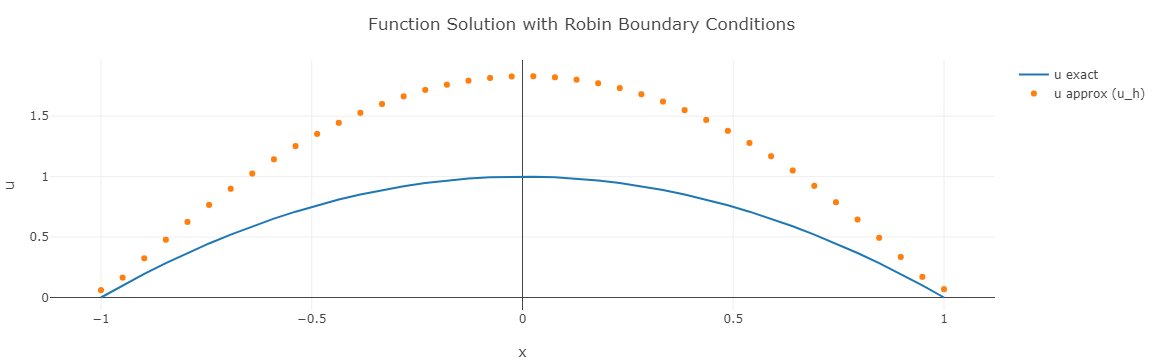

In [27]:
uh3 = Mf\bf;
uexact(x) = 1 - x^2;

plot([scatter(x=x , y=uexact.(x) ,mode="lines", name="u exact"), scatter(x=x , y=uh3[:,1] ,mode="markers", name="u approx (u_h)")],
     Layout(title="Function Solution with Robin Boundary Conditions",  xaxis_title="x",  yaxis_title="u"))

#### e) 
Solving using Dirichlet boundary 

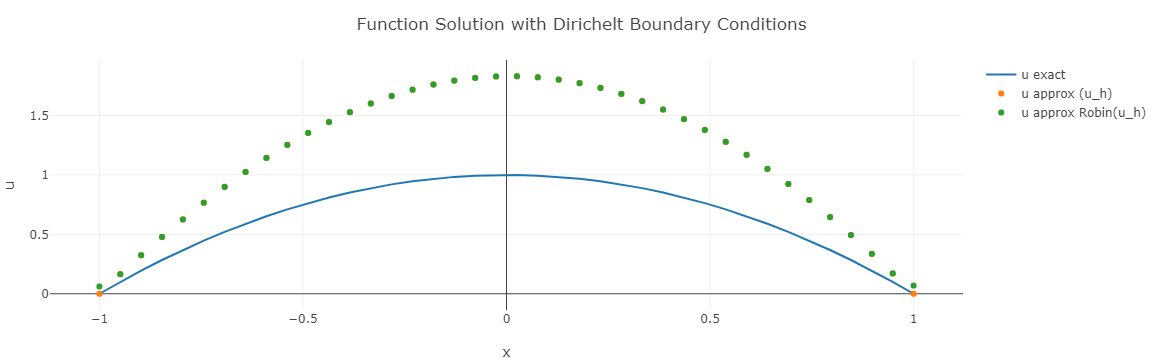

In [ ]:
MDC = Stiffness1D_Hom(x,p)
ADC = Mass1D_Hom(x,r)
bDC = Load1D_hom(x,f)

uh3DBC = [0; MDC\bDC; 0]

plot([scatter(x=x , y=uexact.(x) ,mode="lines", name="u exact"), scatter(x=x , y=uh3DBC[:,1] ,mode="markers", name="u approx (u_h)")],
     Layout(title="Function Solution with Dirichelt Boundary Conditions",  xaxis_title="x",  yaxis_title="u"))

In [36]:
uh3 - uh3DBC

40×1 Matrix{Float64}:
 0.060941956581946045
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.06874926042580592

#### f)
Mesh points error

$$ \epsilon(x) = |u(x_i)-u_h(x_i)|, \quad i=0,1,...,n$$

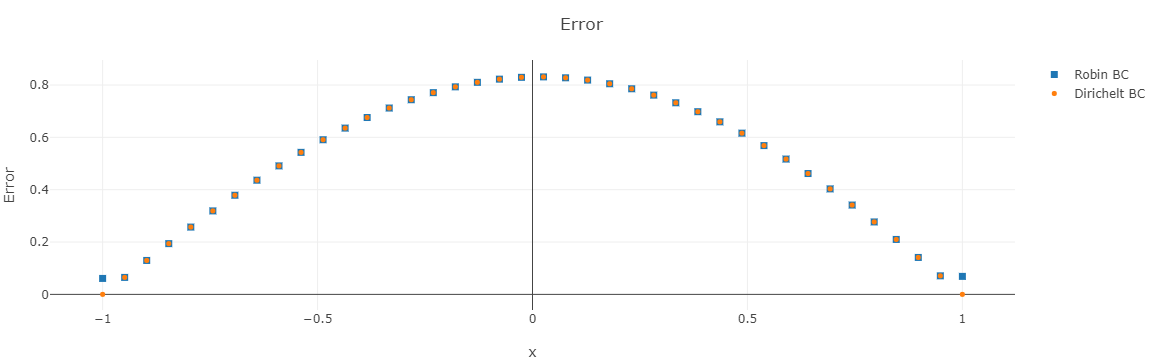

In [29]:
error1, error2 = abs.(uexact.(x) .- uh3)[:,1],  abs.(uexact.(x) .- uh3DBC)[:,1]

plot([scatter(x=x, y=error1, mode="markers", name="Robin BC", marker=attr(size=7, symbol="square")), 
        scatter(x=x , y=error2 ,mode="markers", name="Dirichelt BC", marker=attr(size=5))],
     Layout(title="Error",  xaxis_title="x",  yaxis_title="Error"))

## 4.TP  Bar Deflection

Consider a beam fix in a wall in both extrems like in the figure. The strcutre of lenght $L$ is hold in a distributed load $P [Kg \; m^{-1}$ that vary along the $x$ coordinate. Furthermore, supposse that the beam has a rectangular uniform section of width $r$ and depth $s$, inertial moment $J = rs^3/12 [m^4]$ and Young module $E[kgm^{-2}]$.

The beam deflection, suposing small displacements, is describe by the 4th order differential equation

$$ (EJu''(x))'' = P(x), \qquad \qquad u(0)=u(L)=0, \qquad \qquad u'(0)=u'(L)=0 $$

where the $u=u(x)$ denote the vertical displacement, and the right side are the boundary conditions such that model the fix beam behaviour in both extrems.

a. Write the weak formulation corresponding to the boundary value problem $(4)-(5)$

b. Prove the existence and uniqueness of the weak solution.

To discretize the weak problem we should approximate the space $H_0^2([0,1])$ by a picewise finite dimensional cubic polynomial space

$$ \mathcal{H}_h := \{ \phi \in C^1([0,L]):\; \phi\Big|_{I_i} \in \mathbb{P}_{3}(I_i) \quad i=1,2,...,N; \\
\phi(0)= \phi(1)=0 \quad \text{and} \quad  \phi_x(0)=\phi_x(1)=0 \} $$

where $0 <x_0<x_1<\cdots < x_N =L, \; I_i = (x_{i},x_{i-1}), \; h_i=x_i-x_{i-1}, \; h:=\text{max}_{i=1,...,N}$ and $\mathbb{P}_3(I_i)$ denote the set of all the polynomials over $I_i$ of order less or equal to $3$.

With the goal to build a base for $\mathcal{H}_h$, let's asociate a each inner node $x_k,\; k= 1,...,N-1$ a support $I_k \cup I_{k+1}$ and two functions $\zeta_i$ and $\eta_i$ such that

$$ \zeta_i(x_k) = \delta_{ik}, \qquad \zeta_i'(x_k)=0 \\
\eta_i(x_k) = 0, \qquad \eta_i'(x_k)=\delta_{ik} $$

c. Use the previous conditions to determine the $\zeta_i$ and $\eta_i$ explicit formulas and plot them.

d. Write $u_h$ as a linear combination of the base $\zeta_i$ and $\eta_i$ where $i=1,...,N-1$.

e. Consider the discrete weak formulation. Indicate wich are the unknowns.

f. Find the matrix components of the lineal equation system that gives the finite element discretization.

g. Solve the lineal equation systems useing for $N=25,\;50,\;100$ and $200$ elements. Plot the solution. use the folowwing dates: $EJ =1$, $P(x)=1$, and $L=1$.

### Solution

#### a. 
Multiplying by a test function $v|v(0)=v(L)= v'(0)=v'(L)=0$ and integrating over $I$ the differential equation


$$\int_0^L v(EJu''''(x)) dx = \int_0^L v P(x)dx $$

using integration by steps twice

$$\int_0^L v(EJu(x))'''' dx =  EJvu'''(x)\Big|_0^L - EJ\int_0^L v' u''' =  EJvu'''\Big|_0^L - v'EJu'' \Big|_0^L + EJ\int_0^L v'' u'' dx \\
\int_0^L v(EJu(x))'''' dx =EJ\int_0^L v'' u'' dx $$

Replacing this result in the differential equation

$$ \boxed{EJ\int_0^L v'' u'' = \int_0^L v P(x)dx} $$

This is the weak problem. This equation can be writen as follows

$$ a(u,v) = Lv, \qquad \forall v\in H_0^2(0,L)$$

where 

$$a(y,v) = EJ\int_0^L v'' u''\\
Lv = \int_0^L v P(x)dx$$


#### b. 
To prove its uniqueness let's verify the Lax-Milgram hypothesis with $v\in H$.

- **Bilineal Countinuity:**

Using Cauchy-Schwartz, and Poincare inequality

$$ 
|a(u,v)| = \left|\left| EJ \int_0^L v'' u''\right|\right|   \leq   EJ \int_0^L |v''| \cdot |u''| dx \leq  EJ ||v''||_{L^2} \cdot ||u''||_{L^2}
$$

- **Coercivity:**
$$ 
a(u,u) = EJ\int_0^L u'' u''dx   \geq EJ ||u''||_{L^2}^2 \geq \frac{1}{C_P^2}  ||u'||_{L^2}^2
$$

- **Continuity of V in H:**

$$
|Lv| = \left| \int_0^L v P(x)dx \right| \leq ||P(x)||_{L^2} ||v||_{L^2} \leq C_P ||P(x)||_{L^2} ||v'||_{L^2}\\
\Rightarrow \boxed{ \quad ||L||_{H} \leq C_P   ||P(x)||_{L^2} \leq C_P   ||P(x)||_{L^\infty}}
$$


#### c. 
To construnct these polynomials, such that satisfyes the previous conditions, consider the [Newton's polynomials](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html) of order 3 on the soport $I_i =[x_{i-1}, x_i]$ with the following boundary conditions

<img src="support.png" width="500" class="center"/>


Boundary conditions

$$
\zeta_i(x_{i-1})=0, \; \zeta_i(x_{i})=1, \qquad \zeta_i'(x_{i-1})=0, \;\zeta_i'(x_{i})=0 \\
\eta_i(x_{i-1})=0, \; \eta_i(x_{i})=0, \qquad \eta_i'(x_{i-1})=0, \;\eta_i'(x_{i})=1 $$

Functions and derivatives

$$
\zeta_i(x) = a_0 + a_1 (x - x_{i}) +  a_2 (x - x_{i})(x - x_{i-1}) +  a_3 (x - x_{i})(x - x_{i-1})(x - x_{i+1})\\
\zeta_i'(x) =  a_1 +  a_2 (2x - x_{i}- x_{i-1}) +  a_3 \left[ (x-x_{i-1})(2x-x_{i+1}-x_{i})+ (x-x_i)(x-x_{i+1}) \right] \\
\eta_i(x) = b_0 + b_1 (x - x_{i}) +  b_2 (x - x_{i})(x - x_{i-1}) +  b_3 (x - x_{i})(x - x_{i-1})(x - x_{i+1})\\
\eta_i'(x) = b_1 +  b_2 (2x - x_{i}- x_{i-1}) +  b_3  \left[ (x-x_{i-1})(2x-x_{i+1}-x_{i})+ (x-x_i)(x-x_{i+1}) \right]
$$


Using the boundary conditions at $x_{k-1}$ 


$$
\zeta_i(x_{i-1}) = a_0 + a_1 (x_{i-1} - x_{i})=0, \qquad \Rightarrow \qquad a_1 = -\frac{a_0}{(x_{i-1} - x_{i})}\\
\zeta_i(x_{i}) = a_0 = 1, \qquad \Rightarrow \qquad \boxed{a_0 = 1}\\
\zeta_i'(x_{i-1}) =  a_1 +  a_2 (x_{i-1} - x_{i}) +  a_3 (x_{i-1}-x_i)(x_{i-1}-x_{i+1})  = 0 , \qquad \Rightarrow \qquad a_3 = -\frac{ a_1 +  a_2 (x_{i-1} - x_{i})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1}) } \\
\zeta_i'(x_{i}) =  a_1 +  a_2 (x_{i}- x_{i-1}) +  a_3 (x_{i}-x_{i-1})(x_{i}-x_{i+1})  = 0 , \qquad\Rightarrow \qquad a_3 = -\frac{ a_1 +  a_2 (x_{i}- x_{i-1}) }{(x_{i}-x_{i-1})(x_{i}-x_{i+1})}
$$


$$
\eta_i(x_{i-1}) = b_0 + b_1 (x_{i-1} - x_{i}) = 0 , \qquad \Rightarrow \qquad b_1 = -\frac{b_0}{(x_{i-1} - x_{i})}\\
\eta_i(x_{i}) = b_0 = 0 , \qquad\Rightarrow \qquad\boxed{b_0 = 0} \\
\eta_i'(x_{i-1}) = b_1 +  b_2 (x_{i-1} - x_{i}) +  b_3 (x_{i-1}-x_i)(x_{i-1}-x_{i+1}) = 0 , \qquad \Rightarrow \qquad b_3 = - \frac{b_1 +  b_2 (x_{i-1} - x_{i}) }{ (x_{i-1}-x_i)(x_{i-1}-x_{i+1})} \\
\eta_i'(x_{i}) = b_1 +  b_2 (x_{i}- x_{i-1}) +  b_3  (x_{i}-x_{i-1})(x_{i}-x_{i+1}) = 1 , \qquad \Rightarrow \qquad b_3 = \frac{1- b_1 -  b_2 (x_{i}- x_{i-1}) }{ (x_{i}-x_{i-1})(x_{i}-x_{i+1})}
$$

Then,

$$
\boxed{a_1 = \frac{1}{x_i - x_{i-1}}}\\
a_3 = \frac{1}{(x_{i-1}-x_i)^2(x_{i-1}-x_{i+1}) } - \frac{ a_2 }{(x_{i-1}-x_{i+1}) } = -\frac{ 1 }{(x_{i}-x_{i-1})^2(x_{i}-x_{i+1})}  -\frac{a_2 }{(x_{i}-x_{i+1})}
$$


$$
\boxed{b_1 = 0}\\
b_3 = - \frac{ b_2 }{(x_{i-1}-x_{i+1})} = \frac{1}{ (x_{i}-x_{i-1})(x_{i}-x_{i+1})} - \frac{b_2 }{(x_{i}-x_{i+1})}
$$



$$
a_2 \left[\frac{1 }{(x_{i}-x_{i+1})} - \frac{1}{(x_{i-1}-x_{i+1}) } \right] = - \frac{1}{(x_{i}-x_{i-1})^2}\left[\frac{ 1 }{(x_{i}-x_{i+1})}  +  \frac{1}{(x_{i-1}-x_{i+1}) } \right] \\
a_2 \left[\frac{(x_{i-1}-x_{i+1}) - (x_{i}-x_{i+1}) }{(x_{i}-x_{i+1})(x_{i-1}-x_{i+1})} \right] = - \frac{1}{(x_{i}-x_{i-1})^2}\left[\frac{x_{i-1}-x_{i+1}+x_{i}-x_{i+1}}{(x_{i}-x_{i+1})(x_{i-1}-x_{i+1})} \right] \\
a_2 \left[\frac{x_{i-1} - x_{i}}{(x_{i}-x_{i+1})(x_{i-1}-x_{i+1})} \right] = - \frac{1}{(x_{i}-x_{i-1})^2}\left[\frac{
-2x_{i+1}+x_{i}+x_{i-1}}{(x_{i}-x_{i+1})(x_{i-1}-x_{i+1})} \right] \\
\Rightarrow \qquad \boxed{a_2 = \frac{ 2x_{i+1}-x_{i}-x_{i-1}}{(x_{i}-x_{i-1})^3}}
$$

$$
b_2 \left[ \frac{1}{(x_{i}-x_{i+1})} -  \frac{1}{(x_{i-1}-x_{i+1})} \right] = \frac{1}{ (x_{i}-x_{i-1})(x_{i}-x_{i+1})} \\
b_2 \left[ \frac{x_{i-1}- x_{i}}{(x_{i}-x_{i+1})(x_{i-1}-x_{i+1})} \right] = \frac{1}{ (x_{i}-x_{i-1})(x_{i}-x_{i+1})} \\
\Rightarrow \qquad \boxed{b_2 = \frac{x_{i+1} -x_{i-1}}{(x_{i}-x_{i+1})^2} }
$$

Replacing $a_2$ and $b_2$ to find $a_3$ and $b_3$

$$
a_3 = \frac{1}{(x_{i-1}-x_i)^2(x_{i-1}-x_{i+1}) } - \frac{1}{(x_{i-1}-x_{i+1}) } \; \dot \; \frac{ 2x_{i+1}-x_{i}-x_{i-1}}{(x_{i}-x_{i-1})^3} =  
\frac{1}{(x_{i-1}-x_i)^3(x_{i-1}-x_{i+1}) }  \left[ x_{i-1}-x_i + 2x_{i+1}-x_{i}-x_{i-1} \right] \\
\Rightarrow \qquad \boxed{a_3 =  \frac{2( x_{i+1} -x_i)}{(x_{i-1}-x_i)^3(x_{i-1}-x_{i+1}) }   } \\
b_3 = - \frac{ 1}{(x_{i-1}-x_{i+1})} \; \cdot \; \frac{x_{i+1} -x_{i-1}}{(x_{i}-x_{i+1})^2}, \qquad \Rightarrow \qquad \boxed{b_3  = \frac{1}{(x_{i}-x_{i+1})^2}}
$$

Finally, the functions are

$$
\zeta_i(x) = 1 + \frac{1}{x_i - x_{i-1}} (x - x_{i}) +  \frac{ 2x_{i+1}-x_{i}-x_{i-1}}{(x_{i}-x_{i-1})^3} (x - x_{i})(x - x_{i-1}) +   \frac{2( x_{i+1} -x_i)}{(x_{i-1}-x_i)^3(x_{i-1}-x_{i+1}) } (x - x_{i})(x - x_{i-1})(x - x_{i+1})\\
\eta_i(x) =  \frac{x_{i+1} -x_{i-1}}{(x_{i}-x_{i+1})^2}  (x - x_{i})(x - x_{i-1}) +  \frac{1}{(x_{i}-x_{i+1})^2} (x - x_{i})(x - x_{i-1})(x - x_{i+1})\\
$$

Factorizing,

$$
\zeta_i(x) = 1 + \frac{1}{x_i - x_{i-1}} (x - x_{i}) +  \frac{ 2x_{i+1}-x_{i}-x_{i-1}}{(x_{i}-x_{i-1})^3} (x - x_{i})(x - x_{i-1}) -   \frac{2( x_{i+1} -x_i)}{(x_{i}-x_{i-1})^3(x_{i-1}-x_{i+1}) } (x - x_{i})(x - x_{i-1})(x - x_{i+1})\\
\eta_i(x) =  \frac{(x - x_{i})(x - x_{i-1})^2}{(x_{i}-x_{i+1})^2} 
$$


#### d

With these two functions, $\zeta$ and $\eta$, the approximation of $u$ in $H^2_0$, $u_h$, can be write as a linear combination

$$
u_h (x)  = \sum_{i=1}^{n-1} \left[ u_i \zeta_i(x) +  w_i \eta_i(x) \right]
$$

#### e

Discrete weak formulation

#### f

Matrix components
#### g

Using the data given in the statement

$$ u''''(x) = 1, \qquad \qquad u(0)=u(1)=0, \qquad \qquad u'(0)=u'(1)=0 $$


In [34]:
EJ, L = 1, 1
N = [25 50 100 200]

p(x) = 1

p (generic function with 1 method)

e.i.

$$
a_0  = \delta_{ik} \\
a_1 = -\frac{\delta_{ik}}{x_{k-1} - x_{k}} \\
a_2  = -\frac{a_0 + a_1 (x_{k+1} - x_{k})}{(x_{k+1} - x_{k})(x_{k+1} - x_{k-1})} \\
a_3 = -\frac{a_1  + a_2 (x_{k-1} - x_{k})}{(x_{k-1}-x_k)(x_{k-1}-x_{k+1})} = -\frac{a_1 +  a_2 (x_{k}- x_{k-1})}{(x_k-x_{k-1})(x_k-x_{k+1}) }
$$

$$
b_0 = b_1 = 0 \\
b_2 = - \frac{b_0 + b_1 (x_{k+1} - x_{k})}{(x_{k+1} - x_{k})(x_{k+1} - x_{k-1})}\\
b_3 = -\frac{b_1 +  b_2 (2x_{k+1} - x_{k}- x_{k-1})}{ (x_{k+1}-x_{k-1})(x_{k+1}-x_{k})} =  -\frac{b_1 +  b_2 (x_{k}- x_{k-1})}{ (x_k-x_{k-1})(x_k-x_{k+1}) }
$$


Boundary conditions

$$
\zeta_i(x_{k-1})=0, \; \zeta_i(x_{k+1})=0, \; \zeta_i(x_k) = \delta_{ik}, \qquad \zeta_i'(x_{k-1})=0, \;\zeta_i'(x_{k+1})=0, \; \zeta_i'(x_k) = 0\\
\eta_i(x_{k-1})=0, \;\eta_i(x_{k+1})=0, \; \eta_i(x_k)  = 0, \qquad \eta_i'(x_{k-1})=0, \;\eta_i'(x_{k+1})=0, \; \eta_i'(x_k)  = \delta_{ik}
$$

Functions and derivatives

$$
\zeta_i(x) = a_0 + a_1 (x - x_{k}) +  a_2 (x - x_{k})(x - x_{k-1}) +  a_3 (x - x_{k})(x - x_{k-1})(x - x_{k+1})\\
\zeta_i'(x) =  a_1 +  a_2 (2x - x_{k}- x_{k-1}) +  a_3 \left[ (x-x_{k-1})(2x-x_{k+1}-x_{k})+ (x-x_k)(x-x_{k+1}) \right] \\
\eta_i(x) = b_0 + b_1 (x - x_{k}) +  b_2 (x - x_{k})(x - x_{k-1}) +  b_3 (x - x_{k})(x - x_{k-1})(x - x_{k+1})\\
\eta_i'(x) = b_1 +  b_2 (2x - x_{k}- x_{k-1}) +  b_3  \left[ (x-x_{k-1})(2x-x_{k+1}-x_{k})+ (x-x_k)(x-x_{k+1}) \right]
$$


Using the boundary conditions at $x_{k-1}$ 

$$
\zeta_i(x_{k-1}) = a_0 + a_1 (x_{k-1} - x_{k})=0, \Rightarrow \boxed{a_1 = -\frac{a_0}{x_{k-1} - x_{k}} } \\
\zeta_i'(x_{k-1}) =  a_1  + a_2 (2x_{k-1} - x_{k}- x_{k-1}) + a_3 (x_{k-1}-x_k)(x_{k-1}-x_{k+1}) =0, \qquad \Rightarrow a_3 = -\frac{a_1  + a_2 (x_{k-1} - x_{k})}{(x_{k-1}-x_k)(x_{k-1}-x_{k+1})}  \\
\eta_i(x_{k-1}) = b_0 + b_1 (x_{k-1} - x_{k})=0 , \qquad \Rightarrow  \boxed{b_1 =-\frac{b_0}{x_{k-1} - x_{k}}}\\
\eta_i'(x_{k-1}) = b_1 +  b_2 (2x_{k-1} - x_{k}- x_{k-1}) +  b_3 (x_{k-1}-x_k)(x_{k-1}-x_{k+1})=0 , \qquad \Rightarrow b_3 =-\frac{ b_1 +  b_2 (x_{k-1} - x_{k})}{(x_{k-1}-x_k)(x_{k-1}-x_{k+1})} 
$$


and at $x_{k+1}$

$$
\zeta_i(x_{k+1}) = a_0 + a_1 (x_{k+1} - x_{k}) +  a_2 (x_{k+1} - x_{k})(x_{k+1} - x_{k-1}) =0 , \qquad \Rightarrow a_2  = -\frac{a_0 + a_1 (x_{k+1} - x_{k})}{(x_{k+1} - x_{k})(x_{k+1} - x_{k-1})}\\
\zeta_i'(x_{k+1}) =  a_1 +  a_2 (2x_{k+1} - x_{k}- x_{k-1}) +  a_3  (x_{k+1}-x_{k-1})(2x_{k+1}-x_{k+1}-x_{k}))=0, \qquad \Rightarrow a_3 = -\frac{a_1 +  a_2 (2x_{k+1} - x_{k}- x_{k-1})}{(x_{k+1}-x_{k-1})(x_{k+1}-x_{k})}   \\
\eta_i(x_{k+1}) = b_0 + b_1 (x_{k+1} - x_{k}) +  b_2 (x_{k+1} - x_{k})(x_{k+1} - x_{k-1})=0, \qquad \Rightarrow b_2 = - \frac{b_0 + b_1 (x_{k+1} - x_{k})}{(x_{k+1} - x_{k})(x_{k+1} - x_{k-1})}\\
\eta_i'(x_{k+1}) = b_1 +  b_2 (2x_{k+1} - x_{k}- x_{k-1}) +  b_3  (x_{k+1}-x_{k-1})(2x_{k+1}-x_{k+1}-x_{k}))=0, \qquad \Rightarrow  b_3 = -\frac{b_1 +  b_2 (2x_{k+1} - x_{k}- x_{k-1})}{ (x_{k+1}-x_{k-1})(x_{k+1}-x_{k})}
$$

Furthermore, the conditions at $x_k$

$$
\zeta_i(x_k) = a_0  = \delta_{ik}, \qquad \eta_i(x_k) = b_0 = 0, \qquad \Rightarrow \boxed{b_0 = 0, \; a_0 = \delta_{ik}}  
$$


$$
\zeta_i'(x_k) =  a_1 +  a_2 (x_{k}- x_{k-1}) +  a_3  (x_k-x_{k-1})(x_k-x_{k+1})  = 0, \qquad a_3 = -\frac{a_1 +  a_2 (x_{k}- x_{k-1})}{(x_k-x_{k-1})(x_k-x_{k+1}) }\\
\eta_i'(x_k) = b_1 +  b_2 (x_{k}- x_{k-1}) +  b_3   (x_k-x_{k-1})(x_k-x_{k+1})  = \delta_{ik}, \qquad b_3 = -\frac{b_1 +  b_2 (x_{k}- x_{k-1})}{ (x_k-x_{k-1})(x_k-x_{k+1}) }
$$
